# Задание: определение спам-сообщений

Пошаговая реализация базовой модели логистической регрессии для классификации текстовых сообщений по признаку спама.

In [2]:
import pandas as pd

In [3]:
# Исходные датафрейм.
url2 = 'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv'
texts = pd.read_csv(url2)
texts

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### 1) Приведем весь текст к нижнему регистру.

In [46]:
texts['Message_lower_case'] = texts['Message'].str.lower()
texts.head()

,Category,Message,Message_lower_case
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


#### 2) Удалим "мусорные" символы.

In [47]:
import re

# оставим только слова и цифры
def words_numbers (row):
    return re.sub(r'[\W_]+', ' ', row)
    
texts['Message_words&numbers'] = texts['Message_lower_case'].apply(words_numbers)
texts.head()

,Category,Message,Message_lower_case,Message_words&numbers
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


#### 3) Удалим стоп-слова.

In [48]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# для того, чтобы итерироваться по словам внутри сообщения, сначала разобьем каждую строку на слова с помощью str.split()
# затем исключим из каждой строки служебные слова через apply lambda
texts['Message_no_stopwords'] = texts['Message_words&numbers'].str.split().apply(lambda row: [word for word in row if word not in stop_words])
texts.head()

,Category,Message,Message_lower_case,Message_words&numbers,Message_no_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, think, goes, usf, lives, around, though]"


#### 4) Привидем все слова к нормальной форме.

In [49]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# выносим в новую колонку лемматизированные сообщения
# соединяем список из отдельных слов в предложение через ' '.join()
texts['Message_lemmatized'] = texts['Message_no_stopwords'].apply(lambda row: ' '.join([lemmatizer.lemmatize(word) for word in row]))
texts.head()

,Category,Message,Message_lower_case,Message_words&numbers,Message_no_stopwords,Message_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, think, goes, usf, lives, around, though]",nah think go usf life around though


#### 5) Преобразуем все сообщения в вектора TF-IDF. 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts['Message_lemmatized'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Другой способ для пунктов 1) - 5)

Поэкспериментируем с параметрами TfidfVectorizer.

In [85]:
# сначала создадим копию датафрейма
copy_texts = texts.copy()

# нормализуем текст
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

copy_texts['Message_tokenized'] = copy_texts['Message'].apply(nltk.word_tokenize)

# выносим в новую колонку лемматизированные сообщения
# соединяем список из отдельных слов в предложение через ' '.join()
copy_texts['Message_lemmatized'] = copy_texts['Message_tokenized'].apply(lambda row: ' '.join([lemmatizer.lemmatize(word) for word in row]))
copy_texts.head()

,Category,Message,Message_tokenized,Message_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","Go until jurong point , crazy .. Available onl..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]",Ok lar ... Joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...",U dun say so early hor ... U c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","Nah I do n't think he go to usf , he life arou..."


In [95]:
# затем используем возможности TfidfVectorizer, чтобы привести текст к нижнему регистру, убрать лишние слова и символы
from sklearn.feature_extraction.text import TfidfVectorizer

# lowercase=True по умолчанию, analyzer='word' по умолчанию, 
# token_pattern по умолчанию r”(?u)\b\w\w+\b” (selects tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator))
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(copy_texts['Message_lemmatized'])
names = tfidf.get_feature_names()
tfidf_matrix2 = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix2

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Разница:  
1й способ: 8048 columns  
2й способ: 8070 columns  

Для дальнейшего анализа буду использовать результаты 1го способа.  

#### 6) Разделим данные на тестовые и тренировочные в соотношении 30/70.

In [51]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = texts['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
X_train.shape

(3900, 8048)

In [23]:
y_train.shape

(3900,)

#### 7) Построим модель логистической регрессии, оценим ее точность на тестовых данных.

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# оценим точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.958732057416268

Получили довольно высокий уровень точности ~96%.

#### 8) Опишим результаты при помощи confusion_matrix.

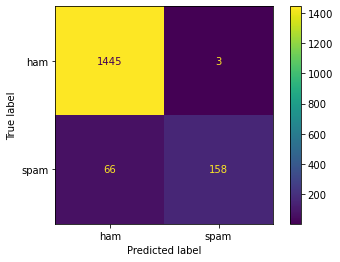

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
cm_display = ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam']).plot()

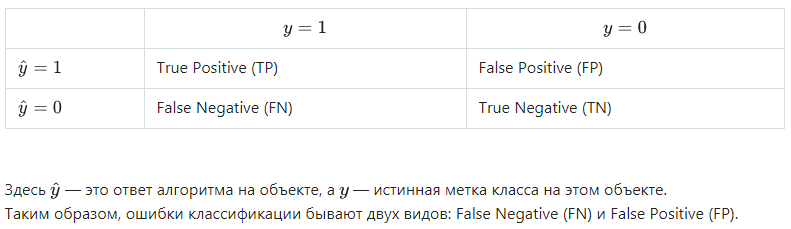

In [36]:
# общий вид confusion matrix
from IPython.display import Image
Image('pic1.png')

Видим, что при определении спама алгоритм допускает много ошибок. Неспам алгоритм выделяет успешнее.
Отметим, что неспама в разы больше, чем спама, поэтому классы не равны, значит accuracy не показательна для нашей задачи. 

Рассмотрим другие метрики (precision (точность) и recall (полнота)) в разрезе каждого класса (спам / не спам).  
Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм*.

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера — среднее гармоническое precision и recall. F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю*.

*https://habr.com/ru/company/ods/blog/328372/

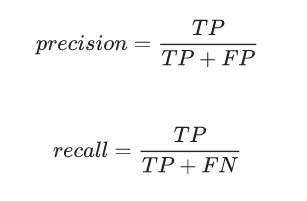

In [40]:
Image('pic2.png')

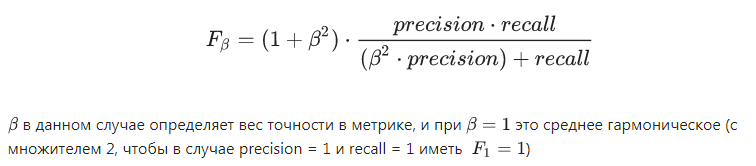

In [41]:
Image('pic3.png')

In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print(report)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.98      0.71      0.82       224

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



Данные classification_report более наглядно показывают, что алгоритм работает с разной точностью для классов спам и не спам.

#### 9) Построим датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [57]:
# соединим тестовую выборку и данные, полученные в результате применения модели
# для этого "сбросим" индексы у тестовой выборки и изменим тип y_pred на series
test_pred_concat = pd.concat([y_test.reset_index(), pd.Series(y_pred, name='Prediction')], axis=1)

# затем вернем прежний индекс
test_pred_concat = test_pred_concat.set_index('index')
test_pred_concat.head()

,Category,Prediction
index,,
3245,ham,ham
944,ham,ham
1044,ham,ham
2484,ham,ham
812,ham,ham


In [58]:
# оставим только некорректную классификацию
incorrect = test_pred_concat.loc[(test_pred_concat['Category']=='ham')&(test_pred_concat['Prediction']=='spam') | 
                    (test_pred_concat['Category']=='spam')&(test_pred_concat['Prediction']=='ham')]
incorrect

,Category,Prediction
index,,
2952,ham,spam
881,spam,ham
1961,spam,ham
3864,spam,ham
2575,spam,ham
...,...,...
4543,spam,ham
752,spam,ham
309,spam,ham


In [62]:
# присоединим датафрейм texts по индексу
incorrect_texts = incorrect.join(texts, lsuffix='_caller', rsuffix='_other')

# удалим лишние столбцы
incorrect_texts = incorrect_texts.drop(incorrect_texts.columns[[2, 4, 5, 6, 7]], axis=1)

# переименуем столбцы
incorrect_texts.columns = ['Initial category', 'Predicted category', 'Message']
incorrect_texts

,Initial category,Predicted category,Message
index,,,
2952,ham,spam,Hey now am free you can call me.
881,spam,ham,Reminder: You have not downloaded the content ...
1961,spam,ham,Guess what! Somebody you know secretly fancies...
3864,spam,ham,Oh my god! I've found your number again! I'm s...
2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...
4543,spam,ham,FreeMsg Hi baby wow just got a new cam moby. W...
752,spam,ham,You have an important customer service announc...
309,spam,ham,TheMob> Check out our newest selection of cont...


Получили датафрейм, содержащий тексты неверно классифицированных сообщений.

#### Итог:
Построенный алгоритм определения спам сообщений работает с разной точностью для спам и неспам сообщений: неспам находит успешнее.